In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
%matplotlib inline

In [53]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


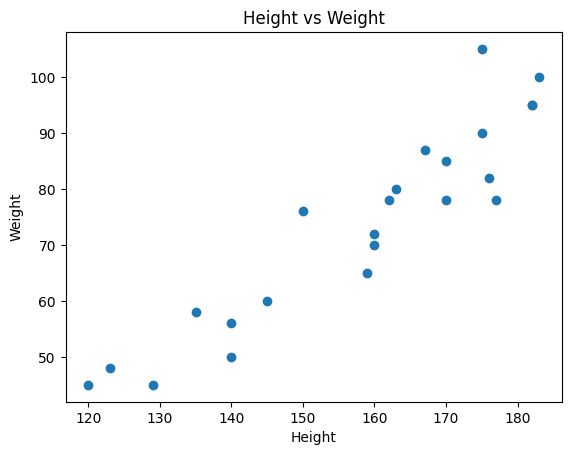

In [54]:
### Scatter plot to visualize the data correlation
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [55]:
### Correlation
correlation = df['Height'].corr(df['Weight'])
print(f'Correlation between Height and Weight: {correlation}')

Correlation between Height and Weight: 0.9311418034329898


In [56]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


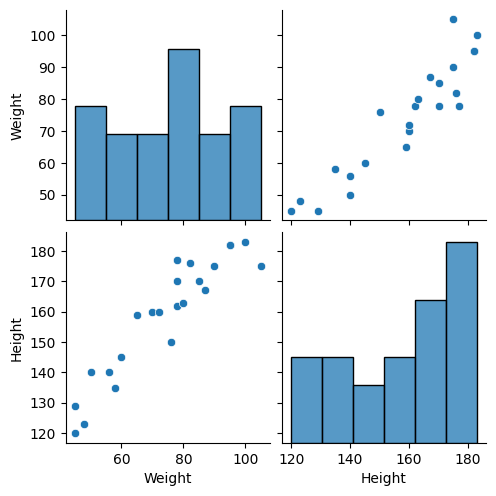

In [57]:
### Seaborn can also be used for better visualization
sns.pairplot(df)

In [58]:
### Divide the data into dependent and independent variables
X = df[['Weight']]  # Independent variable should be 2D array or DataFrame
y = df['Height']    # Dependent variable

In [59]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [60]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [61]:
### Train Teest Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [63]:
### Standardize the data (optional but recommended)
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [64]:
X_train # First 5 rows of standardized X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [65]:
### Apply Simple Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
lin_reg.coef_, lin_reg.intercept_

(array([17.03440872]), np.float64(157.5))

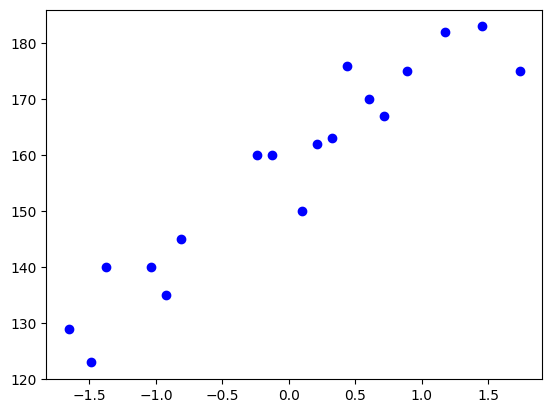

In [67]:
plt.scatter(X_train, y_train, color='blue')

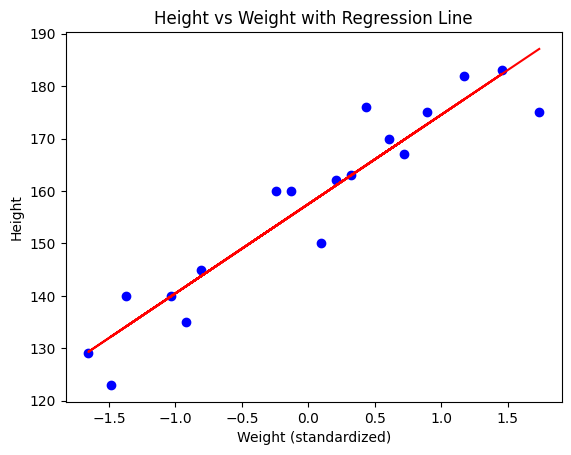

In [68]:
### Plot the regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lin_reg.predict(X_train), color='red')
plt.xlabel('Weight (standardized)')
plt.ylabel('Height')
plt.title('Height vs Weight with Regression Line')
plt.show()

In [69]:
### Predicting the test set results
y_pred = lin_reg.predict(X_test)
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [70]:
### Performance Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [71]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 9.822657814519232
Mean Squared Error (MSE): 109.77592599051664
Root Mean Squared Error (RMSE): 10.477400726827081


In [72]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.776986986042344


In [73]:
# dispay adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2}')

Adjusted R-squared: 0.7026493147231252


### Using OLS Linear Regression

In [89]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [91]:
predictions = model.predict(sm.add_constant(X_test))
predictions

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.53e-09
Time:                        00:35:12   Log-Likelihood:                -57.473
No. Observations:                  18   AIC:                             118.9
Df Residuals:                      16   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.5000      1.474    106.879      0.000     154.376     160.624
x1            17.0344      1.474     11.559      0.000      13.910      20.158
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
### Prediction for a new data

lin_reg.predict(std_scaler.transform([[72]]))  # Predict height for weight of 72 (standardized)

/Users/olutolaoloruntobipaul/Desktop/Projects/personal/ml algorithm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])

In [102]:
x_new_std = std_scaler.transform([[72]])
x_new_std_const = np.concatenate([np.ones((1, 1)), x_new_std], axis=1)
model.predict(x_new_std_const) # Predict height for weight of 70 (standardized)

/Users/olutolaoloruntobipaul/Desktop/Projects/personal/ml algorithm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])